<a href="https://colab.research.google.com/github/GabrielMtzSoltero/SSPIAII/blob/main/05_Scalers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#leer el archivo
dataFilePath = 'breastCancer.csv'

dataFrame = pd.read_csv(dataFilePath)
#revisamos el tipo de dato, para que vean que es un objeto de tipo datafreme de pandas
print(type(dataFrame))


<class 'pandas.core.frame.DataFrame'>


In [5]:
#un vistazo a los datos con los que trabajaremos
dataFrame.head()




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#revisamos que no haya nulos
print(dataFrame.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
dataFrame.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [11]:
dataFrame.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

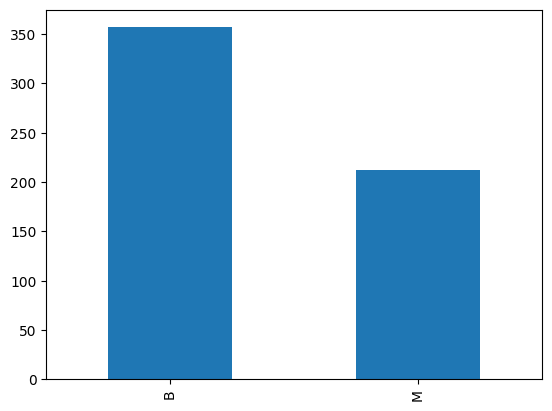

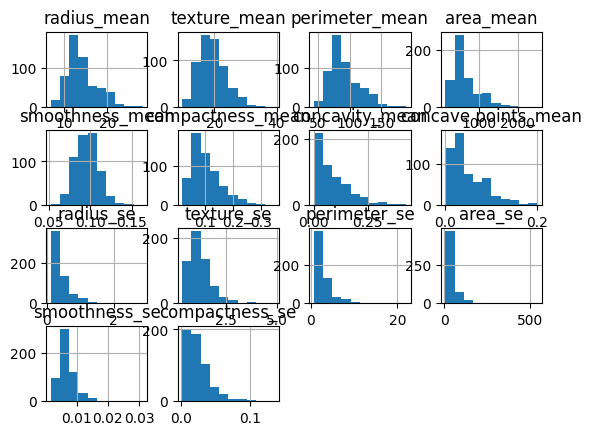

In [12]:
#Ploteamos la cantidad de personas con problemas del corazon (1) y los que no tienen (0)
ax = dataFrame['diagnosis'].value_counts().plot(kind='bar');

#preparar la entrada y la posible salida
dataFrame.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

#creamos los escaladores
scalerMM = MinMaxScaler()
scalerS = StandardScaler()

y=dataFrame['diagnosis'].values
x = dataFrame.drop(["diagnosis","Unnamed: 32","id"], axis = 1)
x.hist(column=['radius_mean' ,'texture_mean' ,'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean' , 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se'])

scaledXDFMM=x.copy()
scaledXDFS=x.copy()

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>],
       [<Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>, <Axes: >, <Axes: >]],
      dtype=object)

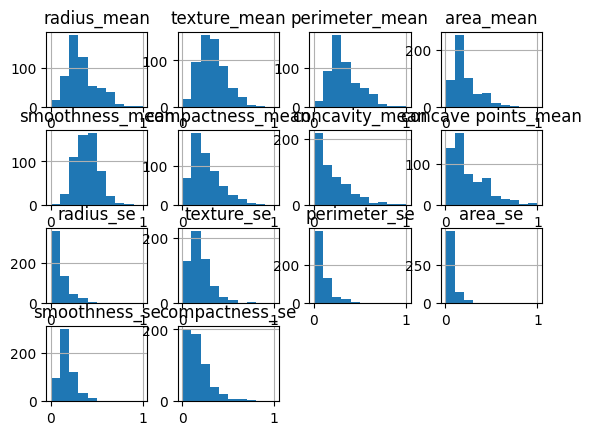

In [37]:
#escalar los valores de entradas
scaledXMM=scalerMM.fit_transform(x)
scaledXDFMM[x.columns]=scalerMM.fit_transform(x)
scaledXDFMM.hist(column=['radius_mean' ,'texture_mean' ,'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean' , 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se'])



array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>],
       [<Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>],
       [<Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>, <Axes: >, <Axes: >]],
      dtype=object)

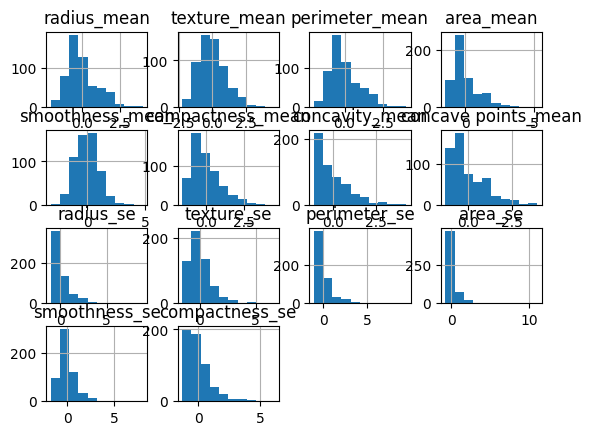

In [14]:

scaledXS=scalerS.fit_transform(x)
scaledXDFS[x.columns]=scalerS.fit_transform(x)
scaledXDFS.hist(column=['radius_mean' ,'texture_mean' ,'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean','concavity_mean', 'concave points_mean' , 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se'])




In [41]:
#SPlitting into train and test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)


#creamos el modelo de un Perceptron multicapa
model=MLPClassifier(alpha=1, max_iter=1000)
#a entrenar
model.fit(xtrain, ytrain)
# Aplicar metrica al modelo
print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))
#sacar la prediccion en la parte del test
ytestpred = model.predict(xtest)



Train:  0.949748743718593
Test:  0.935672514619883


Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       113
           1       0.94      0.86      0.90        58

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.93       171



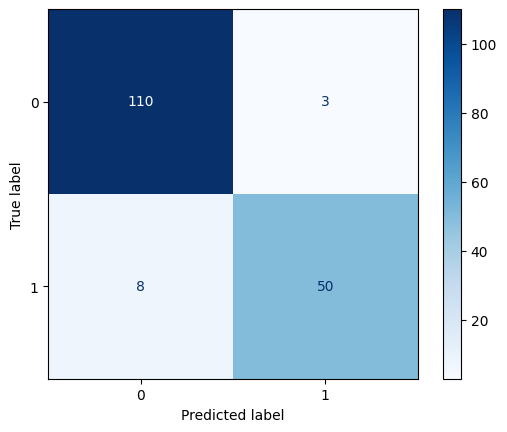

In [42]:
#sacar el reporte de clasificacion
print('Classification report: \n', classification_report(ytest, ytestpred))
#class_names=["no sano"," sano"]
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay.from_predictions(ytest,ytestpred,cmap='Blues')

Train:  0.9874371859296482
Test:  0.9590643274853801
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       113
           1       0.96      0.91      0.94        58

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



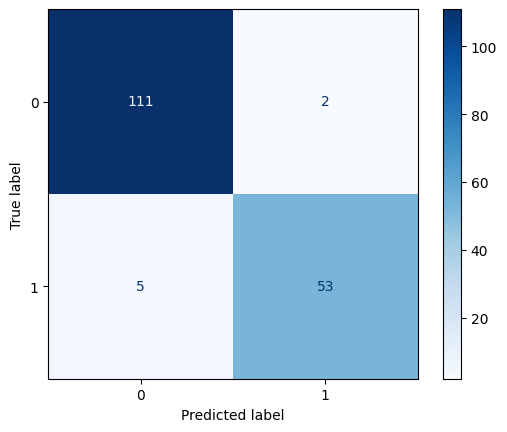

In [46]:
#SPlitting into train and test
scalerMM.fit(xtrain)
xtrainMM=scalerMM.transform(xtrain)
xtestMM=scalerMM.transform(xtest)

#creamos el modelo de un Perceptron multicapa
model=MLPClassifier(alpha=1, max_iter=1000)
#a entrenar
model.fit(xtrainMM, ytrain)
# Aplicar metrica al modelo
print('Train: ', model.score(xtrainMM, ytrain))
print('Test: ', model.score(xtestMM, ytest))
#sacar la prediccion en la parte del test
ytestpred = model.predict(xtestMM)
#sacar el reporte de clasificacion
print('Classification report: \n', classification_report(ytest, ytestpred))
#class_names=["no sano"," sano"]
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay.from_predictions(ytest,ytestpred,cmap='Blues')

Train:  0.992462311557789
Test:  0.9649122807017544
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       113
           1       0.96      0.93      0.95        58

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



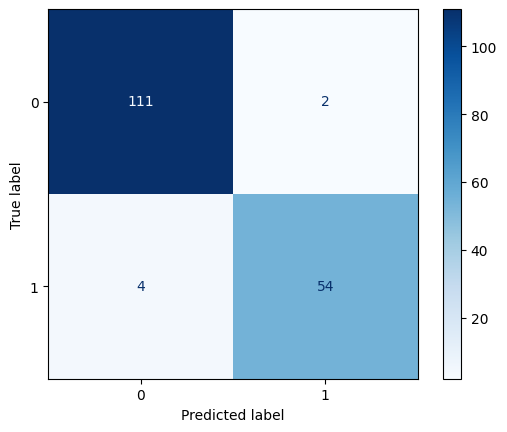

In [47]:
#SPlitting into train and test
scalerMM.fit(xtrain)
xtrainS=scalerS.transform(xtrain)
xtestS=scalerS.transform(xtest)

#creamos el modelo de un Perceptron multicapa
model=MLPClassifier(alpha=1, max_iter=1000)
#a entrenar
model.fit(xtrainS, ytrain)
# Aplicar metrica al modelo
print('Train: ', model.score(xtrainS, ytrain))
print('Test: ', model.score(xtestS, ytest))
#sacar la prediccion en la parte del test
ytestpred = model.predict(xtestS)
#sacar el reporte de clasificacion
print('Classification report: \n', classification_report(ytest, ytestpred))
#class_names=["no sano"," sano"]
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay.from_predictions(ytest,ytestpred,cmap='Blues')